# Ultimate Technologies Inc. Take-Home Challenge


Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

# Part 1

## Import the Libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and check the data

In [111]:
udc_data = pd.read_json(r"C:\Users\aasha\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json")

In [113]:
udc_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


## Convert to datetime

In [116]:
udc_data['login_time'] = pd.to_datetime(udc_data['login_time'])

## Set the datetime as index

In [119]:
udc_data.set_index('login_time', inplace = True)

## Aggregate into 15 minutes interval

In [122]:
udc_data_counts = udc_data.resample('15T').size().to_frame(name='login_count')

C:\Users\aasha\AppData\Local\Temp\ipykernel_2432\2205766291.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  udc_data_counts = udc_data.resample('15T').size().to_frame(name='login_count')


## Plot the time series

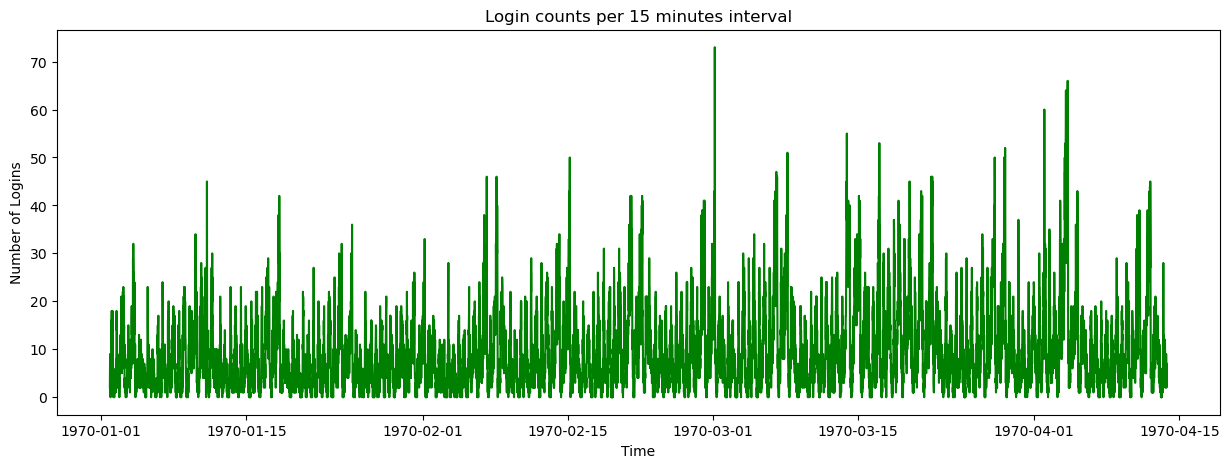

In [125]:
plt.figure(figsize=(15,5))
plt.plot(udc_data_counts.index, udc_data_counts['login_count'], color='green')
plt.title('Login counts per 15 minutes interval')
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.show()

## Visualize daily pattern

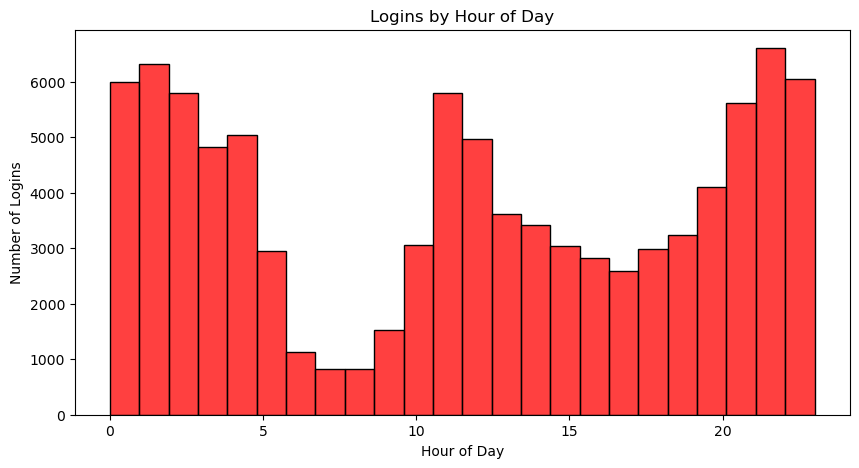

In [128]:
udc_data['hour'] = udc_data.index.hour
udc_data['weekday'] = udc_data.index.dayofweek

plt.figure(figsize=(10,5))
sns.histplot(udc_data['hour'], bins=24, kde=False, color='red')
plt.title('Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.show()

## Average login per hour

C:\Users\aasha\AppData\Local\Temp\ipykernel_2432\969422938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_login_by_weekday.index, y=avg_login_by_weekday.values, palette='viridis')


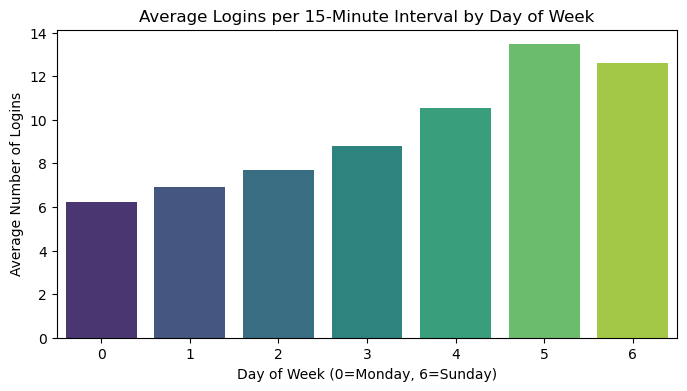

In [131]:
udc_data_counts['weekday'] = udc_data_counts.index.dayofweek
avg_login_by_weekday = udc_data_counts.groupby('weekday')['login_count'].mean()

plt.figure(figsize=(8,4))
sns.barplot(x=avg_login_by_weekday.index, y=avg_login_by_weekday.values, palette='viridis')
plt.title('Average Logins per 15-Minute Interval by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Number of Logins')
plt.show()

## Heatmap of Day vs Hour

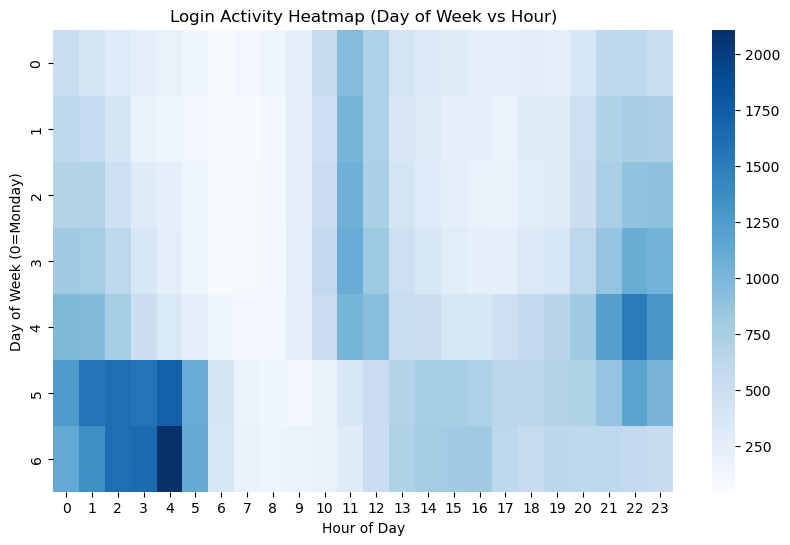

In [134]:
heatmap_data = udc_data.groupby([udc_data.index.dayofweek, udc_data.index.hour]).size().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='Blues', annot=False)
plt.title('Login Activity Heatmap (Day of Week vs Hour)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Monday)')
plt.show()


## Check for data quality issues

In [137]:
# Check for duplicate values
duplicates = udc_data.index.duplicated().sum()
print(duplicates)

877


In [139]:
# Check for missing intervals
missing_intervals = udc_data_counts.isna().sum()
print(missing_intervals)

login_count    0
weekday        0
dtype: int64


# Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on 
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most activ 
during the day. On weekends, there is reasonable activity in both citie .
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tnd
to be exclusive to each city. The Ultimate managers of city operations for the two cities  ave
proposed an experiment to encourage driver partners to be available in both citie , by
reimbursing all toll  
c 1) s.
1) What would you choose as the key measure of success of this experi ent in
encouraging driver partners to serve both cities, and why would you choose this

Ans: The primary measure of success for this experiment is the proportion of active drivers who complete trips in both cities within the same day or week because it captures if toll reimbursement reduces the barrier to cross city driving causing the behavioral change we want.

 2) Describe a practical experiment you would design to compare the effectiveness of the 
proposed change in relation to the key measure of success. Please provide details on
:
a) how you will implement the experime

Ans: I would set up a Randomized Control Trial (RCT). I would find drivers active in both cities. Then I would randomly assign them to two groups; control group and treatment group where control group would have no change and treatment group would have tolls reimbursed. Then I would run the experiment for 4-6 weeks to capture both weekdays and weekends patterns. I would focus on the data of each driver driving in Gotham, each driver driving in Metropolis and number of cross city switches per day or week.

t
b) what statistical test(s) you will conduct to verify the significance of  observation

Ans: The statistical tests that I would conduct to verify the significance of the observation are two sample Z-tests for proportions and chi squared tests for independence.
tion
c) how you would interpret the results and provide recommendations to the city
operations team along with any ca

Ans: If the experiment shows a statistically significant increase in the proportion of drivers serving both cities in the treatment group compared to the control group, we can conclude that toll costs were a meaningful barrier to cross city driving, and reimbursing tolls effectively encouraged drivers to operate more flexibly. On the other hand, if there is no significant difference in city switching behavior, it would suggest that toll costs are not the primary factor limiting cross city driving, and further investigation would be needed to identify other constraints, such as driver preferences, traffic patterns, or imbalance in trip demand between the two cities. Additionally, if the results show partial improvement, such as increased city switching only on weekends, this could indicate that drivers are responding selectively based on when it is most profitable or convenient, leading to recommendations for a targeted or time based toll policy. In all cases, it is important to consider external factors like fuel prices, traffic congestion, or seasonal demand that may influence the results, as well as the possibility of behavioral changes reversing once the incentive ends.veats. metric?